# Read Training results

## Python 2

In [1]:
from __future__ import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
import scipy.sparse as sp
from sklearn import metrics
import pandas as pd
import pickle
import datetime
import os

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
tf.__version__

'1.8.0'

In [4]:
f0 = 'results_training/TRAIN_real_genes_16837_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'

In [5]:
f1 = 'results_training/BASE_TRAIN_real_genes_16837_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
f2 = 'results_training/TRAIN_NOGRADreal_genes_16837_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
f3 = 'results_training/TRAIN_MODELREDreal_genes_16837_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
f4 = 'results_training/TRAIN_2RELUreal_genes_16837_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
filenames = [f0,f1,f2,f3,f4]

In [6]:
time = np.zeros([5])
vms_all = np.zeros([5])
rss_all = np.zeros([5])
val_real = np.zeros([50,10,3,5])
test_real = np.zeros([10,3,5])
sims = ['gpu','base','no_grad','reduced','2ReLU']
metrics = ['AUROC','AUPRC','Accuracy']

In [7]:
with open(f0, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
time[0] = train_time
vms_all[0] = vms
rss_all[0] = rss
val_real[:,:,:,0] = val_metrics
test_real[:,:,0] = test_metrics

mb_time Imported successfully
train_time Imported successfully
test_metrics Imported successfully
edge2name Imported successfully
val_metrics Imported successfully
gene2idx Imported successfully
epoch Imported successfully
drug2idx Imported successfully
vms Imported successfully
rss Imported successfully


In [8]:
with open(f1, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
time[1] = train_time
vms_all[1] = vms
rss_all[1] = rss
val_real[:,:,:,1] = val_metrics
test_real[:,:,1] = test_metrics

mb_time Imported successfully
train_time Imported successfully
test_metrics Imported successfully
edge2name Imported successfully
val_metrics Imported successfully
gene2idx Imported successfully
epoch Imported successfully
drug2idx Imported successfully
vms Imported successfully
rss Imported successfully


In [9]:
with open(f2, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
time[2] = train_time
vms_all[2] = vms
rss_all[2] = rss
val_real[:,:,:,2] = val_metrics
test_real[:,:,2] = test_metrics

mb_time Imported successfully
train_time Imported successfully
test_metrics Imported successfully
edge2name Imported successfully
val_metrics Imported successfully
gene2idx Imported successfully
epoch Imported successfully
drug2idx Imported successfully
vms Imported successfully
rss Imported successfully


In [10]:
with open(f3, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
time[3] = train_time
vms_all[3] = vms
rss_all[3] = rss
val_real[:,:,:,3] = val_metrics
test_real[:,:,3] = test_metrics

mb_time Imported successfully
train_time Imported successfully
test_metrics Imported successfully
edge2name Imported successfully
val_metrics Imported successfully
gene2idx Imported successfully
epoch Imported successfully
drug2idx Imported successfully
vms Imported successfully
rss Imported successfully


In [11]:
with open(f4, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
time[4] = train_time
vms_all[4] = vms
rss_all[4] = rss
val_real[:,:,:,4] = val_metrics
test_real[:,:,4] = test_metrics

mb_time Imported successfully
train_time Imported successfully
test_metrics Imported successfully
edge2name Imported successfully
val_metrics Imported successfully
gene2idx Imported successfully
epoch Imported successfully
drug2idx Imported successfully
vms Imported successfully
rss Imported successfully


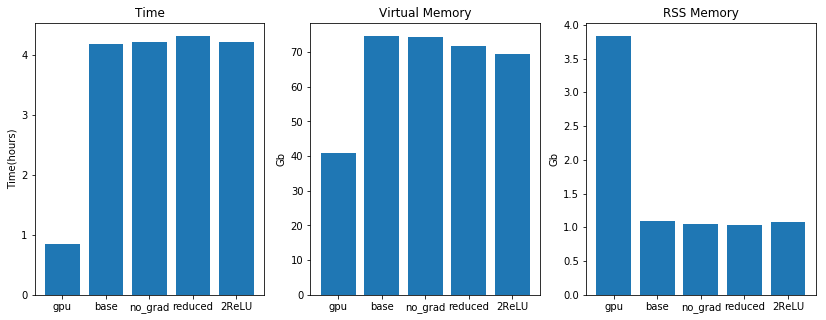

In [12]:
x = np.arange(5)+1
figure(figsize=[14,5])
ax1=subplot(1,3,1)
bar(x,time/3600)
ylabel('Time(hours)')
title('Time')
ax1.set_xticks(x)
ax1.set_xticklabels(sims)
ax2=subplot(1,3,2)
bar(x,vms_all*1e-9)
ylabel('Gb')
title('Virtual Memory')
ax2.set_xticks(x)
ax2.set_xticklabels(sims)
ax3=subplot(1,3,3)
bar(x,rss_all*1e-9)
ylabel('Gb')
title('RSS Memory')
ax3.set_xticks(x)
ax3.set_xticklabels(sims)
show()

In [14]:
r = 0
edge_type2idx = {}
idx2edge_type = {}
for i, j in edge2name:
    for k in range(len(edge2name[i,j])):
        edge_type2idx[i, j, k] = r
        idx2edge_type[r] = i, j, k
        r += 1

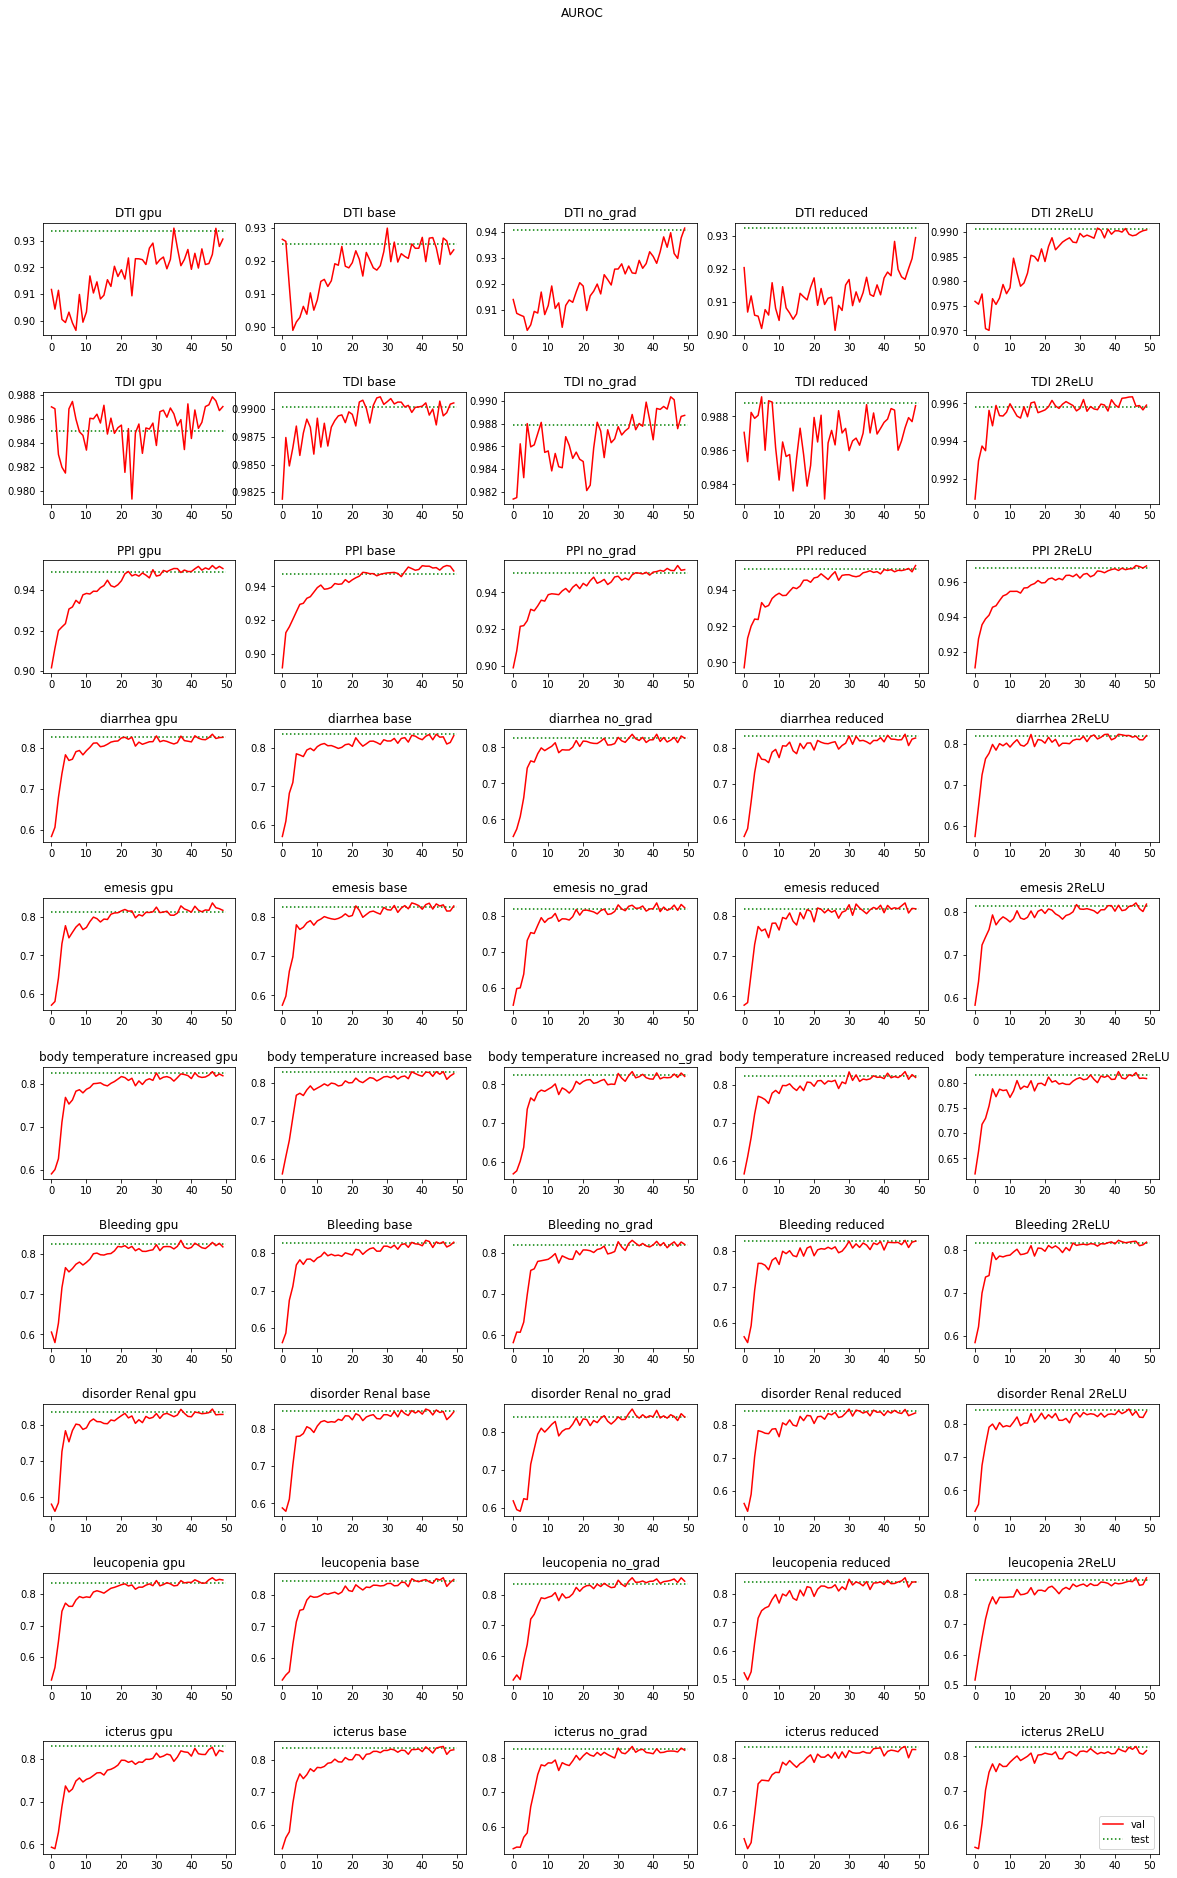

In [15]:
m = 0
n_se = 10
n_sim = 5
fig, axs = plt.subplots(n_se,n_sim, figsize=(20,30), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .5, wspace=.2)
#axs = axs.ravel()
cont = 0
for i in range(n_se):
    for j in range(n_sim):
        a,b,c = idx2edge_type[cont]
        #color=next(axs[i,j]._get_lines.prop_cycler)['color']
        #axs[i,j].plot(train_real[:,i,m,j],'r',label='train')#,linewidth=3, alpha=0.6)
        axs[i,j].plot(val_real[:,i,m,j],'r', label='val')
        axs[i,j].hlines(test_real[i,m,j],0,50, 'g', linestyles='dotted', label='test')
        axs[i,j].set_title(edge2name[a,b][c]+' '+sims[j])
    cont+=1
    legend(loc='lower right')

## Unfinished result

In [3]:
filename = 'results_training/TRAIN_INC_real_genes_19081_drugs_639_se_964_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'

In [4]:
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

epoch Imported successfully
val_metrics Imported successfully


In [5]:
epoch

6

In [ ]:
figure()
for i in range(3,10):
    plot(test_real[i,1,:])

In [ ]:
train_real = np.zeros([50,10,3,5])
val_real = np.zeros([50,10,3,5])
test_real = np.zeros([10,3,5])
metrics = ['AUROC','AUPRC','Accuracy']
sims = ['no_aff','nofeat','DSE','BDM','w2']

In [ ]:
file_no_aff = 'results_training/TRAIN_real_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
file_no_feat = 'results_training/TRAIN_real_BDM_genes_16814_drugs_276_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
file_DSE = 'results_training/TRAIN_real_DSE_8120_genes_16814_drugs_276_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
file_BDM = 'results_training/TRAIN_real_BDM_genes_16814_drugs_276_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
file_w2 = 'results_training/TRAIN_real_DSE_8120_BDM_genes_16814_drugs_276_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
filenames = [file_no_aff,file_no_feat,file_DSE,file_BDM,file_w2]

In [ ]:
with open(file_no_aff, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
count = 0
for i in filenames:
    with open(i, 'rb') as f:
        print(sims[count])
        DS = pickle.load(f)
        for key in DS.keys():
            globals()[key]=DS[key]
            print(key,"Imported successfully")
    if count==0:
        test_temp = test_metrics[3,:]
        test_metrics[3:9,:] = test_metrics[4:,:]
        test_metrics[-1,:] = test_temp
        train_temp = train_metrics[:,3,:]
        train_metrics[:,3:9,:] = train_metrics[:,4:,:]
        train_metrics[:,-1,:] = train_temp
        val_temp = val_metrics[:,3,:]
        val_metrics[:,3:9,:] = val_metrics[:,4:,:]
        val_metrics[:,-1,:] = val_temp
        temp_name = edge2name[1,1][0]
        edge2name[1,1].remove(temp_name)
        edge2name[1,1].append(temp_name)
    train_real[:,:,:,count] = train_metrics
    val_real[:,:,:,count] = val_metrics
    test_real[:,:,count] = test_metrics
    count += 1
    print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
    print('Train Time:',datetime.timedelta(seconds=train_time))
    print('Virtual Memory:',vms*1e-9,'Gb')
    print('RSS Memory:',rss*1e-9,'Gb')
    print('\n')
names = edge2name

In [ ]:
r = 0
edge_type2idx = {}
idx2edge_type = {}
for i, j in names:
    for k in range(len(names[i,j])):
        edge_type2idx[i, j, k] = r
        idx2edge_type[r] = i, j, k
        r += 1

In [ ]:
m = 0
n_se = 10
n_sim = 5
fig, axs = plt.subplots(n_se,n_sim, figsize=(20,30), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .5, wspace=.2)
#axs = axs.ravel()
cont = 0
for i in range(n_se):
    for j in range(n_sim):
        a,b,c = idx2edge_type[cont]
        #color=next(axs[i,j]._get_lines.prop_cycler)['color']
        #axs[i,j].plot(train_real[:,i,m,j],'r',label='train')#,linewidth=3, alpha=0.6)
        axs[i,j].plot(val_real[:,i,m,j],'r', label='val')
        axs[i,j].hlines(test_real[i,m,j],0,50, 'g', linestyles='dotted', label='test')
        axs[i,j].set_title(names[a,b][c]+' '+sims[j])
    cont+=1
    legend(loc='lower right')

In [ ]:
train_real = np.zeros([50,10,3,4])
train_docking = np.zeros([50,10,3,4])
train_binding = np.zeros([50,10,3,4])
val_real = np.zeros([50,10,3,4])
val_docking = np.zeros([50,10,3,4])
val_binding = np.zeros([50,10,3,4])
test_real = np.zeros([10,3,4])
test_docking = np.zeros([10,3,4])
test_binding = np.zeros([10,3,4])
metrics = ['AUROC','AUPRC','Accuracy']
sims = ['nofeat','DSE','BDM','w2']
modes = ['nofeat','docking','binding']

In [ ]:
for root, dirs, files in os.walk("./results_training/"):
    for fi in files:
        count=0
        words = fi.split('_')
        if '4116' in words:
            with open(root + fi, 'rb') as f:
                DS = pickle.load(f)
                print(words[2:6])
                for key in DS.keys():
                    globals()[key]=DS[key]
                    print(key,"Imported successfully")
            if 'DSE' in words and 'BDM' in words: count=3
            elif 'BDM' in words: count=2
            elif 'DSE' in words: count=1
            if 'docking' in words:
                train_dnames = edge2nameocking[:,:,:,count] = train_metrics
                val_docking[:,:,:,count] = val_metrics
                test_docking[:,:,count] = test_metrics
            elif 'binding' in words:
                train_binding[:,:,:,count] = train_metrics
                val_binding[:,:,:,count] = val_metrics
                test_binding[:,:,count] = test_metrics
            else:
                train_real[:,:,:,count] = train_metrics
                val_real[:,:,:,count] = val_metrics
                test_real[:,:,count] = test_metrics
            names = edge2name
            print(count)
            print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
            print('Train Time:',datetime.timedelta(seconds=train_time))
            print('Virtual Memory:',vms*1e-9,'Gb')
            print('RSS Memory:',rss*1e-9,'Gb')
            print('\n')

In [ ]:
train = np.concatenate([train_real.reshape(50,10,3,4,1),train_docking.reshape(50,10,3,4,1)\
                        ,train_binding.reshape(50,10,3,4,1)],axis=4)
val = np.concatenate([val_real.reshape(50,10,3,4,1),val_docking.reshape(50,10,3,4,1)\
                        ,val_binding.reshape(50,10,3,4,1)],axis=4)
test = np.concatenate([test_real.reshape(10,3,4,1),test_docking.reshape(10,3,4,1)\
                        ,test_binding.reshape(10,3,4,1)],axis=3)

In [ ]:
r = 0
edge_type2idx = {}
idx2edge_type = {}
for i, j in names:
    for k in range(len(names[i,j])):
        edge_type2idx[i, j, k] = r
        idx2edge_type[r] = i, j, k
        r += 1

In [ ]:
m = 1
n_se = 10
n_sim = 4
n_modes = 3
fig, axs = plt.subplots(n_se,n_sim, figsize=(12,28), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .5, wspace=.1)
#axs = axs.ravel()
for e in range(n_se):
    i,j,k = idx2edge_type[e]
    for n in range(n_sim):
        for l in range(n_modes):
            color=next(axs[e,n]._get_lines.prop_cycler)['color']
            axs[e,n].plot(train[:,e,m,n,l],color=color,label=modes[l])#,linewidth=3, alpha=0.6)
            axs[e,n].plot(val[:,e,m,n,l],'--',color=color)
            axs[e,n].hlines(test[e,m,n,l],0,50, colors=color, linestyles='dotted')
            axs[e,n].set_title(names[i,j][k]+' '+sims[n])
    legend(loc='lower right')

## Results of 7 worst performed side effects

In [ ]:
train_real = np.zeros([50,10,3,4])
train_toy = np.zeros([50,10,3,4])
val_real = np.zeros([50,10,3,4])
val_toy = np.zeros([50,10,3,4])
test_real = np.zeros([10,3,4])
test_toy = np.zeros([10,3,4])
metrics = ['AUROC','AUPRC','Accuracy']
sims = ['nofeat','DSE','BDM','w2']

#### Real no feat

In [ ]:
filename = './results_training/TRAIN_real_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
names = edge2name
train_real[:,:,:,0] = train_metrics
val_real[:,:,:,0] = val_metrics
test_real[:,:,0] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real DSE

In [ ]:
filename = './results_training/TRAIN_real_DSE_9700_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_real[:,:,:,1] = train_metrics
val_real[:,:,:,1] = val_metrics
test_real[:,:,1] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real BDM

In [ ]:
filename = './results_training/TRAIN_real_BDM_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_real[:,:,:,2] = train_metrics
val_real[:,:,:,2] = val_metrics
test_real[:,:,2] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real w2

In [ ]:
filename = './results_training/TRAIN_real_BDM_DSE_9700_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_real[:,:,:,3] = train_metrics
val_real[:,:,:,3] = val_metrics
test_real[:,:,3] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Toy no feat

In [ ]:
filename = './results_training/TRAIN_toy_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_toy[:,:,:,0] = train_metrics
val_toy[:,:,:,0] = val_metrics
test_toy[:,:,0] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Toy DSE

In [ ]:
filename = './results_training/TRAIN_toy_DSE_9700_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_toy[:,:,:,1] = train_metrics
val_toy[:,:,:,1] = val_metrics
test_toy[:,:,1] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Toy BDM

In [ ]:
filename = './results_training/TRAIN_toy_BDM_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_toy[:,:,:,2] = train_metrics
val_toy[:,:,:,2] = val_metrics
test_toy[:,:,2] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Toy w2

In [ ]:
filename = './results_training/TRAIN_toy_BDM_DSE_9700_genes_16271_drugs_636_se_7_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1_valsize_0.15'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
train_toy[:,:,:,3] = train_metrics
val_toy[:,:,:,3] = val_metrics
test_toy[:,:,3] = test_metrics
print('Pre train Time:',datetime.timedelta(seconds=pre_train_time))
print('Train Time:',datetime.timedelta(seconds=train_time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

In [ ]:
print(np.shape(train_real))
print(np.shape(val_real))
print(np.shape(test_real))

In [ ]:
r = 0
edge_type2idx = {}
idx2edge_type = {}
for i, j in names:
    for k in range(len(names[i,j])):
        edge_type2idx[i, j, k] = r
        idx2edge_type[r] = i, j, k
        r += 1

### Plotting for real

In [ ]:
m = 1
fig, axs = plt.subplots(2,5, figsize=(18, 9), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for e in range(10):
    i,j,k = idx2edge_type[e]
    for s in [1,3]:
        color=next(axs[e]._get_lines.prop_cycler)['color']
        axs[e].plot(train_real[:,e,m,s],color=color,label=sims[s])#,linewidth=3, alpha=0.6)
        axs[e].plot(val_real[:,e,m,s],'--',color=color)
        axs[e].hlines(test_real[e,m,s],0,50, colors=color, linestyles='dotted')
        axs[e].set_title(names[i,j][k])
legend(loc='lower right')

### Plotting for toy

In [ ]:
m = 1
fig, axs = plt.subplots(2,5, figsize=(18, 9), squeeze=True, facecolor='w', edgecolor='k')
fig.suptitle(metrics[m])
fig.subplots_adjust(hspace = .4, wspace=.15)
axs = axs.ravel()
for e in range(10):
    i,j,k = idx2edge_type[e]
    for s in [1,3]:
        color=next(axs[e]._get_lines.prop_cycler)['color']
        axs[e].plot(train_toy[:,e,m,s],color=color,label=sims[s])
        axs[e].plot(val_toy[:,e,m,s],'--',color=color)
        axs[e].hlines(test_toy[e,m,s],0,50, colors=color, linestyles='dotted')
        axs[e].set_title(names[i,j][k])
legend(loc='lower right')

## Results with training & validation accuracy

In [ ]:
ses = ['DTI','DTI(T)','PPI','PPI(T)'] +\
    2*['Mumps', 'carbuncle', 'coccydynia', 'Bleeding','disorder Renal', 'emesis']
ses_pairs = [(0,1),(2,3),(4,10),(5,11),(6,12),(7,13),(8,14),(9,15)]
sims = ['toy','toyDSE','toyBDM','toyw2','real','realDSE','realBDM','realw2']
sims = ['real','realDSE','realBDM','realw2']
metrics = ['AUROC','AUCPR','Val acc','Train acc']
n_ses = len(ses)
n_sims = len(sims)
epochs = 50

In [ ]:
data = np.zeros([epochs,n_ses,4,n_sims])
test_data = np.zeros([n_ses,3,n_sims])
performance = np.zeros([3,n_sims])

In [ ]:
filename = './data/data_structures/DECAGON/DECAGON_real_genes_16271_drugs_636_se_7'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
degrees[1]

In [ ]:
filename = './data/data_structures/DECAGON/DECAGON_real_genes_16266_drugs_627_se_6'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
degrees[1][0]
#se_combo_name2idx

#### Real no features

In [ ]:
filename = './results_training/TRAIN_real_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,0] = val_auc.transpose()
data[:,:,1,0] = val_auprc.transpose()
data[:,:,2,0] = val_acc
data[:,:,3,0] = train_acc
test_data[:,:,0] = test_scores
performance[:,0] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real DSE

In [ ]:
filename = './results_training/TRAIN_real_DSE_9688_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,1] = val_auc.transpose()
data[:,:,1,1] = val_auprc.transpose()
data[:,:,2,1] = val_acc
data[:,:,3,1] = train_acc
test_data[:,:,1] = test_scores
performance[:,1] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real BDM

In [ ]:
filename = './results_training/TRAIN_real_BDM_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,2] = val_auc.transpose()
data[:,:,1,2] = val_auprc.transpose()
data[:,:,2,2] = val_acc
data[:,:,3,2] = train_acc
test_data[:,:,2] = test_scores
performance[:,2] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

#### Real DSE BDM

In [ ]:
filename = './results_training/TRAIN_real_BDM_DSE_9688_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,3] = val_auc.transpose()
data[:,:,1,3] = val_auprc.transpose()
data[:,:,2,3] = val_acc
data[:,:,3,3] = train_acc
test_data[:,:,3] = test_scores
performance[:,3] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

### Performance plots

In [ ]:
x = np.arange(4)+1
figure(figsize=[15,5])
ax1=subplot(1,3,1)
bar(x,performance[0,:]/3600)
ylabel('Time(hours)')
title('Time')
ax1.set_xticks(x)
ax1.set_xticklabels(sims)
ax2=subplot(1,3,2)
bar(x,performance[1,:]*1e-9)
ylabel('Gb')
title('Virtual Memory')
ax2.set_xticks(x)
ax2.set_xticklabels(sims)
ax3=subplot(1,3,3)
bar(x,performance[2,:]*1e-9)
ylabel('Gb')
title('RSS Memory')
ax3.set_xticks(x)
ax3.set_xticklabels(sims)
show()

In [ ]:
pair_idx = 5
figure(figsize=[12,12])
suptitle(ses[ses_pairs[pair_idx][0]]+' AUPRC',fontsize=16)
for i in range(n_sims):   
    subplot(2,2,i+1)
    test_val = test_data[ses_pairs[pair_idx][0],1,i]
    hlines(test_val,0,50, colors='g', linestyles='dashed', label='test')
    text(0, test_val, str(np.round(test_val,3)), fontsize=14,color='g')
    plot(data[:,ses_pairs[pair_idx][0],3,i],label='train',color='r')
    plot(data[:,ses_pairs[pair_idx][0],2,i],label='validation',color='b')
    legend(loc='best')
    title(sims[i])
show()

In [ ]:
m=0
figure(figsize=[18,15])
suptitle(metrics[m],x=0.5,y=1.25,fontsize=20)
for i in range(n_ses):
    ax = subplot(4,4,i+1)
    for j in range(n_sims):
        color=next(ax._get_lines.prop_cycler)['color']
        plot(data[:,i,m,j],label=sims[j],color=color)
        test_val = test_data[i,int(m*3/4),j]
        hlines(test_val,0,50, colors=color, linestyles='dashed')
        title(ses[i])
    legend()
subplots_adjust(left=None, bottom=0.1, right=None, top=1.2, wspace=None, hspace=None)
show()

## Data with BDM and w/o protein features

In [ ]:
new_data = np.zeros([16,21,4,5])
new_perf = np.zeros([3,5])
new_epochs = np.arange(21)

#### Real only BDM

In [ ]:
print('REAL NO FEAT')
filename = './results_training/TRAIN_real_BDM_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,0] = val_auc
new_data[:,:,1,0] = val_auprc
new_data[:,:,2,0] = val_apk
new_data[:,:,3,0] = train_cost
new_perf[:,0] = time,vms,rss

#### Real with drug features & BDM

In [ ]:
print('REAL DSE')
filename = './results_training/TRAIN_real_BDM_DSE_9688_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,1] = val_auc
new_data[:,:,1,1] = val_auprc
new_data[:,:,2,1] = val_apk
new_data[:,:,3,1] = train_cost
new_perf[:,1] = time,vms,rss

#### Toy only BDM

In [ ]:
print('TOY NO FEAT')
filename = './results_training/TRAIN_toy_BDM_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,3] = val_auc
new_data[:,:,1,3] = val_auprc
new_data[:,:,2,3] = val_apk
new_data[:,:,3,3] = train_cost
new_perf[:,3] = time,vms,rss

#### Toy with drug features & BDM

In [ ]:
print('TOY DSE')
filename = './results_training/TRAIN_toy_BDM_DSE_9688_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,4] = val_auc
new_data[:,:,1,4] = val_auprc
new_data[:,:,2,4] = val_apk
new_data[:,:,3,4] = train_cost
new_perf[:,4] = time,vms,rss

## Toy without features

In [ ]:
print('TOY NO FEAT')
filename = './results_training/TRAIN_toy_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,2] = val_auc
new_data[:,:,1,2] = val_auprc
new_data[:,:,2,2] = val_apk
new_data[:,:,3,2] = train_cost
new_perf[:,2] = time,vms,rss

## Data from first simulations

In [ ]:
data = np.zeros([16,72,4,2])
perf = np.zeros([3,2])
epochs = np.linspace(0,20,72)

#### Real without features

In [ ]:
print('REAL NO FEAT')
filename = './results_training/TRAIN_real_reduced_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
data[:,:,0,0] = val_auc
data[:,:,1,0] = val_auprc
data[:,:,2,0] = val_apk
data[:,:,3,0] = train_cost
perf[:,0] = time,vms,rss

#### Real with Drug features

In [ ]:
print('REAL DSE')
filename = './results_training/TRAIN_real_reduced_DSE_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
data[:,:,0,1] = val_auc
data[:,:,1,1] = val_auprc
data[:,:,2,1] = val_apk
data[:,:,3,1] = train_cost
perf[:,1] = time,vms,rss

## Performance plots

In [ ]:
perf = np.concatenate((perf,new_perf),axis=1)

In [ ]:
x = np.arange(7)+1
labels = ['R','R+D','R+C','R+D+C','T','T+C','T+D+C']
figure(figsize=[15,5])
ax1=subplot(1,3,1)
bar(x,perf[0,:]/3600)
ylabel('Time(hours)')
title('Time')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax2=subplot(1,3,2)
bar(x,perf[1,:]*1e-9)
ylabel('Gb')
title('Virtual Memory')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax3=subplot(1,3,3)
bar(x,perf[2,:]*1e-9)
ylabel('Gb')
title('RSS Memory')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
show()

## Toy data plots

In [ ]:
ses = ['DTI','DTI(T)','PPI','PPI(T)'] + 2*['Neumonia','High blood pressure',
                                             'Acute kidney failure','Heart rate increased',
                                             'Heart attack','Respiratory failure']
sims_new = ['real BDM','real DSE+BDM', 'toy', 'toy BDM','toy DSE+BDM']
metric = ['AUROC','AUPRC','AU@50','Train cost']

In [ ]:
m = 0 #index of metric
figure(figsize=[14,10])
suptitle(metric[m], fontsize=14)
dims = np.shape(new_data)
for i in range(len(ses)):
    subplot(4,4,i+1)
    for j in [2,3,4]:
        plot(new_data[i,:,m,j],label=sims_new[j])
    title(ses[i])
    subplots_adjust(left=None, bottom=0.1, right=None, top=1.2, wspace=None, hspace=None)
legend(loc='upper left')
suptitle(metric[m], fontsize=20,y=1.25)
show()

## Real data plots

In [ ]:
m = 0 #index of metric
figure(figsize=[14,10])
suptitle(metric[m], fontsize=14)
dims = np.shape(new_data)
for i in range(len(ses)):
    subplot(4,4,i+1)
    plot(epochs,data[i,:,m,0],label='real no feat')
    plot(epochs,data[i,:,m,1],label='real DSE')
    plot(new_epochs,new_data[i,:,m,0],label='real BDM')
    plot(new_epochs,new_data[i,:,m,1],label='real DSE+BDM')
    title(ses[i])
    subplots_adjust(left=None, bottom=0.1, right=None, top=1.2, wspace=None, hspace=None)
legend(loc='lower right')
suptitle(metric[m], fontsize=20,y=1.25)
show()

## Data for presentation AlgDyn

In [ ]:
# Data structure loading
filename = './data/data_structures/DECAGON_real_reduced_DSE'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
c = np.zeros([len(adj_mats_orig[1,1])])
for i in range(len(c)):
    c[i] = np.sum(adj_mats_orig[1,1][i])
c

In [ ]:
names = ['DTI','DTI(T)','PPI','PPI(T)'] + 2*['Neumonia','High blood pressure',
                                             'Acute kidney failure','Heart rate increased',
                                             'Heart attack','Respiratory failure']

In [ ]:
filenames = ['reduced','reduced_DSE','reduced_DSE_PF','reduced_DSE_NPF','reduced_DSE_PF_BDM'
            ,'reduced_DSE_NPF_BDM']
titles = ['No Features','DSE','DSE + PF','DSE+NPF','BDM + PF','BDM + NPF']

In [ ]:
# Results loading
filename = './results_training/TRAIN_real_reduced_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

In [ ]:
n_files = len(titles)
idx = [0,2,4,5,6,7,8,9]
data_AUROC = np.zeros([len(idx),72,n_files])
data_AUPRC = np.zeros([len(idx),72,n_files])
for i in range(n_files):
    filename = './results_training/TRAIN_real_' + filenames[i] + '_epochs20_h164_h232_lr0.001dropout0.1'
    f = open(filename, 'rb')
    DS = pickle.load(f)
    for j in range(len(idx)):
        val_auc = DS['val_auc']
        val_auprc = DS['val_auprc']
        data_AUROC[j,:,i] = val_auc[idx[j],:]
        data_AUPRC[j,:,i] = val_auprc[idx[j],:]
    f.close()

In [ ]:
figure(figsize(20,12))
for i in range(n_files):
    subplot(2,3,i+1)
    for j in range(len(idx)):
        plot(data_AUROC[j,:,i],label=names[idx[j]])
    title(titles[i])
    legend()
show()

In [ ]:
figure(figsize(20,12))
for i in range(len(idx)):
    subplot(2,4,i+1)
    for j in range(n_files):
        plot(data_AUPRC[i,:,j],label=titles[j])
    title(names[idx[i]])
    legend()
show()

# Final performance for all networks

In [ ]:
apk_red_BDM_NPF = pd.read_csv('results_training/apk_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
apk_red_BDM_PF = pd.read_csv('results_training/apk_red_BDM_PF.txt',header=None).to_numpy().squeeze()
apk_red_DSE_NPF = pd.read_csv('results_training/apk_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
apk_red_DSE_PF = pd.read_csv('results_training/apk_red_DSE_PF.txt',header=None).to_numpy().squeeze()
apk_red_DSE = pd.read_csv('results_training/apk_red_DSE.txt',header=None).to_numpy().squeeze()
apk_red = pd.read_csv('results_training/apk_red.txt',header=None).to_numpy().squeeze()
apk = np.stack([apk_red,apk_red_DSE,apk_red_DSE_PF,apk_red_DSE_NPF,apk_red_BDM_PF,
                apk_red_BDM_NPF]).reshape(6,16,1)


In [ ]:
auroc_red_BDM_NPF = pd.read_csv('results_training/auroc_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
auroc_red_BDM_PF = pd.read_csv('results_training/auroc_red_BDM_PF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE_NPF = pd.read_csv('results_training/auroc_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE_PF = pd.read_csv('results_training/auroc_red_DSE_PF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE = pd.read_csv('results_training/auroc_red_DSE.txt',header=None).to_numpy().squeeze()
auroc_red = pd.read_csv('results_training/auroc_red.txt',header=None).to_numpy().squeeze()
auroc = np.stack([auroc_red,auroc_red_DSE,auroc_red_DSE_PF,auroc_red_DSE_NPF,
                  auroc_red_BDM_PF,auroc_red_BDM_NPF]).reshape(6,16,1)


In [ ]:
auprc_red_BDM_NPF = pd.read_csv('results_training/auprc_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
auprc_red_BDM_PF = pd.read_csv('results_training/auprc_red_BDM_PF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE_NPF = pd.read_csv('results_training/auprc_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE_PF = pd.read_csv('results_training/auprc_red_DSE_PF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE = pd.read_csv('results_training/auprc_red_DSE.txt',header=None).to_numpy().squeeze()
auprc_red = pd.read_csv('results_training/auprc_red.txt',header=None).to_numpy().squeeze()
auprc = np.stack([auprc_red,auprc_red_DSE,auprc_red_DSE_PF,auprc_red_DSE_NPF,
                  auprc_red_BDM_PF,auprc_red_BDM_NPF]).reshape(6,16,1)

In [ ]:
final_metrics = np.concatenate([auroc,auprc,apk],axis=2)

In [ ]:
figure(figsize=[16,8])
labels = ['no feat', 'DSE', 'DSE + PF', 'DSE + N', 'BDM + PF' , 'BDM + N']
idx2=[4,5,6,7,8,9]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
cont=1
for i in [0,2]:
    a = final_metrics[:,i,0]
    b = final_metrics[:,i,1]
    ax = subplot(1,2,cont)
    bar(x - width/2, a , width/2, label='AUROC')
    bar(x + width/2, b, width/2, label='AUPRC')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    xticks(x, labels)
    title(names[i])
    legend(loc='lower center')
    eps = 0.05
    cont+=1
    for j in range(len(a)):
        text(x[j] - width/2-eps, a[j]-eps/4, str(round(a[j],2)))#, color='blue', fontweight='bold')
        text(x[j]+width/2, b[j], str(round(b[j],2)))#, color='blue', fontweight='bold')
    
show()